In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt

import OnlineVariance
import DataGenerator
import BinaryStrategy
import PositiveStrategy
import Simulator

In [2]:
"""
how many context variables will be available for an observation?
more features means slower learning.
"""
features=5
"""
arms: how many bandits being compared? These are the options under
consideration and from which we want to choose optimally based
on the known values of `features`. more arms means slower learning.
"""
arms=3
"""
rewardType represents the type of payout from the bandits.
It can be one of:
- `positive`: positive real number values
- `mixed`: real number values, i.e. it's possible to receive a penalty
- `binary`: values are either 0 or 1
"""
rewardType='float'
"""
featureType represents the some contextual attribute of the
observation. It can be one of:
- `integer`: some integer value (representing e.g. age)
- `binary`: either 0 or 1 (representing e.g. isMobile, isNewUser)
"""
featureType='binary'
"""
variables related to simulation and reporting in this notebook, and
not critical for using the data generator or simulator in general.
- `num_samples`: number of samples to randomly generate...
- `num_batches`: ...and how many batches of size `num_samples` to make
- `num_experiments`: how many times to generate. multiple experiments
  allows averaging of results (smoother charts)
"""
rewardType='positive'
#rewardType='binary'
#rewardType='mixed'
featureType='integer'
#featureType='binary'

# define number of samples and number of choices
num_samples = 1000
num_batches = 100
num_experiments = 3

dg = DataGenerator.DataGenerator(arms,features,feature_type=featureType,reward_type=rewardType)

#appropriate model for reward_type='positive' or reward_type='mixed'
positiveStrategy = PositiveStrategy.PositiveStrategy(arms,features)
simulator = Simulator.Simulator(positiveStrategy)
#appropriate model for reward_type='binary'
#binaryStrategy = BinaryStrategy.BinaryStrategy(arms,features)
#regret,delta = binaryStrategy.simulate(sample_features,sample_rewards,dg.W)
"""
TODO
"""
rmse = np.zeros((int(dg.generate_samples(1)[1].size/simulator.model.K),1))

In [3]:
total_regret = []
total_rmse = []

for e in range(0,num_experiments):
    print("experiment: %d" % e)
    #reset the model, which accumulates data per experiment
    positiveStrategy = PositiveStrategy.PositiveStrategy(arms,features)

    previous_rmse = 0.
    if previous_rmse == 0:
        initial_rmse = rmse[0][-1]
    
    for b in range(0,num_batches):
        (sample_features, sample_rewards) = dg.generate_samples(num_samples)    
        regret, rmse = simulator.simulate(sample_features, sample_rewards, dg.W)
        
        if previous_rmse == 0:
            initial_rmse = rmse[0][-1]
            previous_rmse = rmse[0][-1]
        print("\tbatch: %d, started at: %f, now: %f" % (b, abs(initial_rmse), abs(rmse[0][-1])))
        if (len(total_rmse) == 0):
            total_rmse = rmse
            total_regret = regret
        else:
            total_rmse += rmse
            total_regret += regret

mean_regret = total_regret / num_experiments
mean_rmse   = total_rmse   / num_experiments


experiment: 0
	batch: 0, started at: 0.650335, now: 0.650335
	batch: 1, started at: 0.650335, now: 1.915068
	batch: 2, started at: 0.650335, now: 1.969907
	batch: 3, started at: 0.650335, now: 1.937972
	batch: 4, started at: 0.650335, now: 1.878182
	batch: 5, started at: 0.650335, now: 1.918976
	batch: 6, started at: 0.650335, now: 1.864964
	batch: 7, started at: 0.650335, now: 1.848078
	batch: 8, started at: 0.650335, now: 1.816812
	batch: 9, started at: 0.650335, now: 1.815026
	batch: 10, started at: 0.650335, now: 1.803850
	batch: 11, started at: 0.650335, now: 1.802201
	batch: 12, started at: 0.650335, now: 1.830023
	batch: 13, started at: 0.650335, now: 1.829184
	batch: 14, started at: 0.650335, now: 1.816048
	batch: 15, started at: 0.650335, now: 1.812720
	batch: 16, started at: 0.650335, now: 1.812432
	batch: 17, started at: 0.650335, now: 1.821195
	batch: 18, started at: 0.650335, now: 1.819212
	batch: 19, started at: 0.650335, now: 1.832124
	batch: 20, started at: 0.650335, no

	batch: 71, started at: 1.839454, now: 1.835528
	batch: 72, started at: 1.839454, now: 1.836232
	batch: 73, started at: 1.839454, now: 1.837335
	batch: 74, started at: 1.839454, now: 1.837933
	batch: 75, started at: 1.839454, now: 1.837392
	batch: 76, started at: 1.839454, now: 1.836105
	batch: 77, started at: 1.839454, now: 1.835170
	batch: 78, started at: 1.839454, now: 1.835528
	batch: 79, started at: 1.839454, now: 1.835660
	batch: 80, started at: 1.839454, now: 1.836074
	batch: 81, started at: 1.839454, now: 1.835968
	batch: 82, started at: 1.839454, now: 1.836096
	batch: 83, started at: 1.839454, now: 1.835129
	batch: 84, started at: 1.839454, now: 1.835365
	batch: 85, started at: 1.839454, now: 1.835626
	batch: 86, started at: 1.839454, now: 1.834052
	batch: 87, started at: 1.839454, now: 1.834624
	batch: 88, started at: 1.839454, now: 1.834058
	batch: 89, started at: 1.839454, now: 1.835278
	batch: 90, started at: 1.839454, now: 1.835295
	batch: 91, started at: 1.839454, now: 1

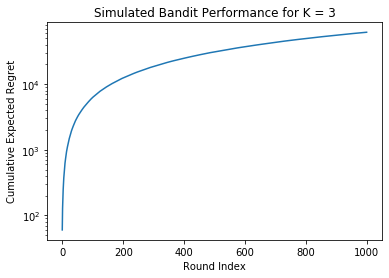

In [4]:
#regret_accumulator = np.cumsum(sample_regret)
#np.cumsum(sample_regret)
plt.semilogy(np.cumsum(mean_regret)/num_experiments)
plt.title('Simulated Bandit Performance for K = ' + str(arms))
plt.ylabel('Cumulative Expected Regret')
plt.xlabel('Round Index')
#plt.legend(('Random','Naive','Epsilon-Greedy','(1 - 1/t) UCB','95% UCB',"thompson", "thomson normal"),loc='lower right')
plt.show()

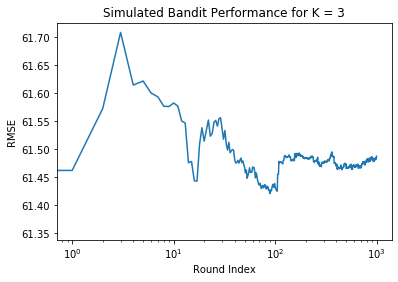

In [5]:
#regret_accumulator = np.cumsum(sample_regret)
#np.cumsum(sample_regret)
plt.semilogx(mean_rmse/num_experiments)
plt.title('Simulated Bandit Performance for K = ' + str(arms))
plt.ylabel('RMSE')
plt.xlabel('Round Index')
#plt.legend(('Random','Naive','Epsilon-Greedy','(1 - 1/t) UCB','95% UCB',"thompson", "thomson normal"),loc='lower right')
plt.show()